In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pickle
from moviepy.editor import VideoFileClip
from camera_calibration import CameraCalibration
%matplotlib inline

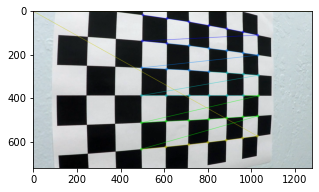

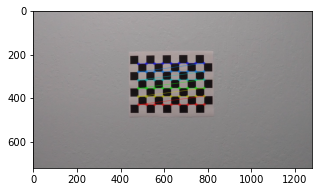

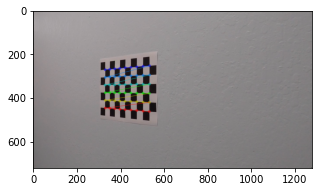

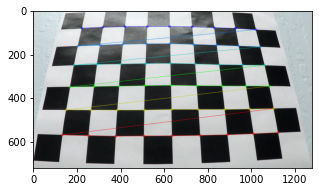

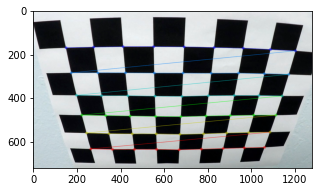

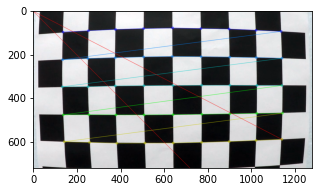

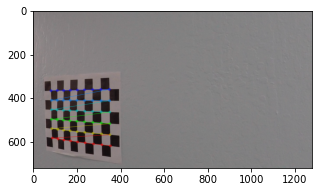

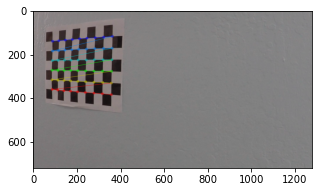

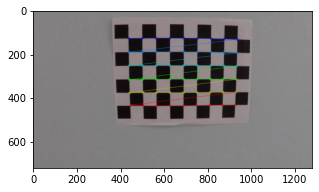

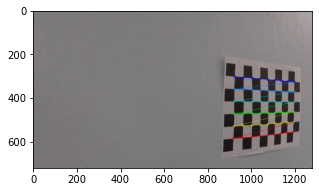

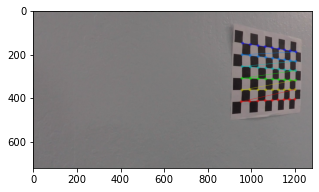

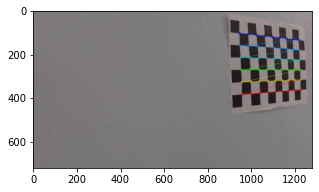

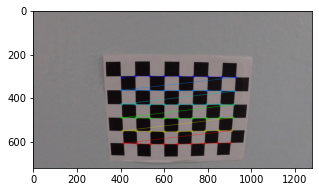

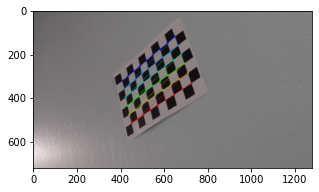

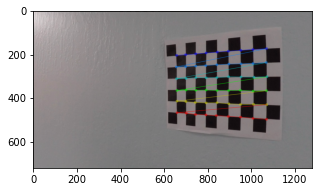

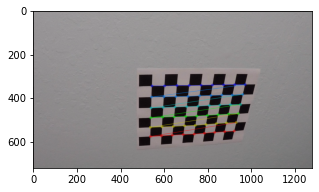

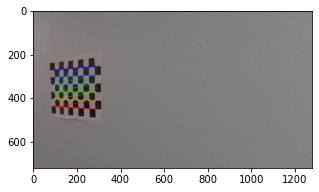

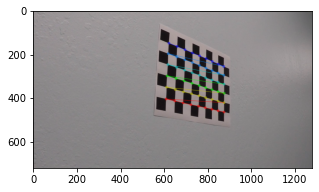

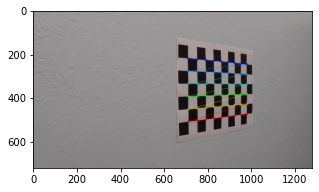

In [4]:
# Calibrating the car camera using chessboard corners detection.

directory = 'camera_cal/'
images = glob.glob(os.path.join(directory, 'calibration*.jpg'))

cam_cal = CameraCalibration()

mtx, dist = cam_cal.camera_calibration(images, nx = 9, ny = 6, draw = True)

In [5]:
# Save calibration results to a pickle file 

cal_pickle = {}
cal_pickle['mtx'] = mtx
cal_pickle['dist'] = dist
with open('camera_cal/cal_pickle.p','wb') as output_file:
    pickle.dump(cal_pickle, output_file)

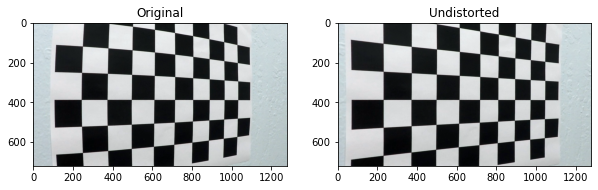

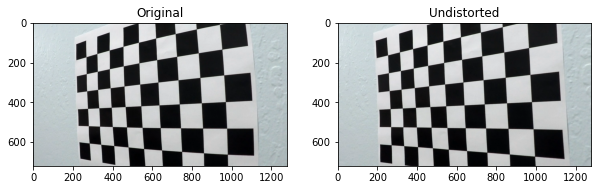

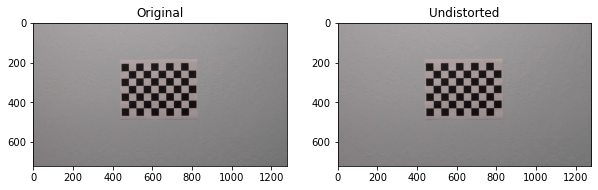

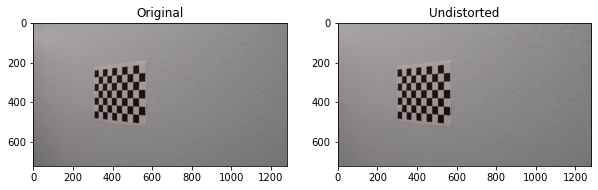

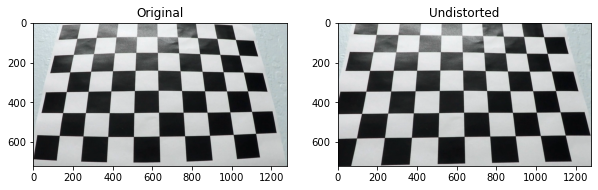

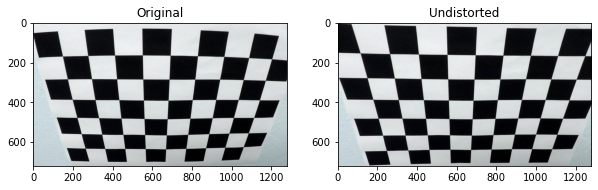

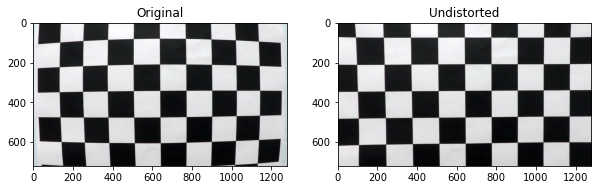

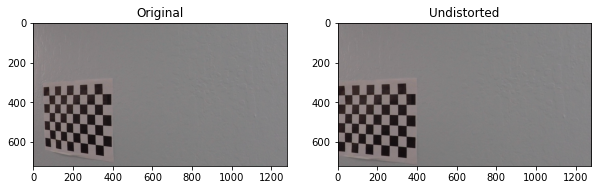

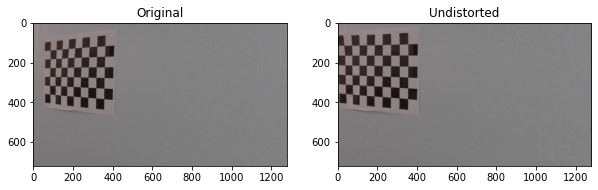

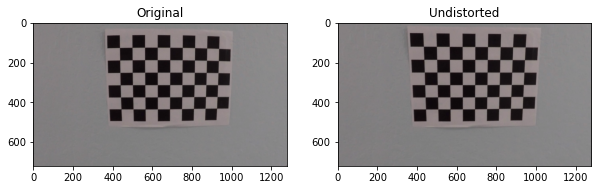

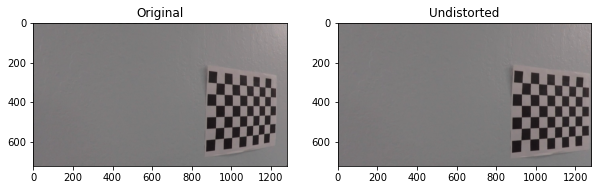

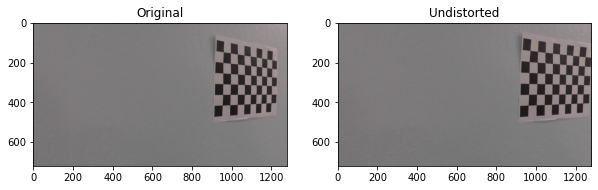

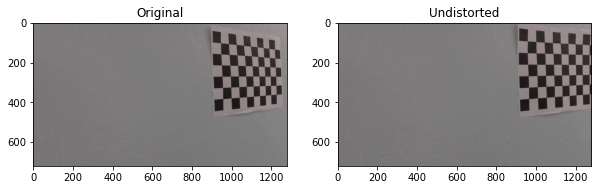

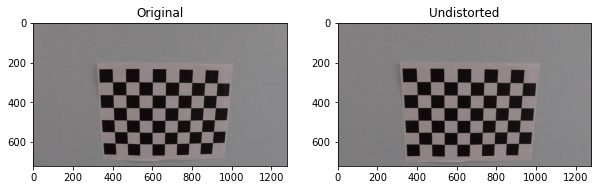

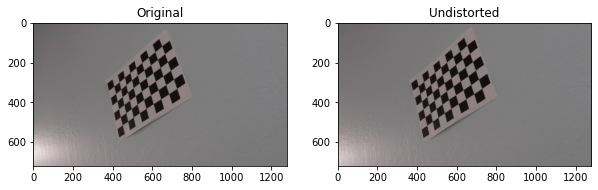

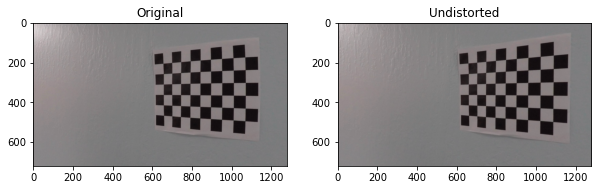

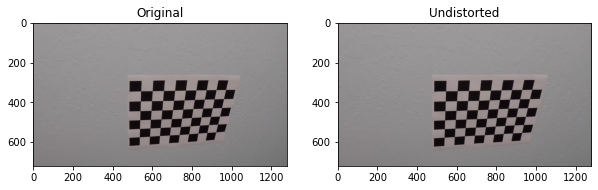

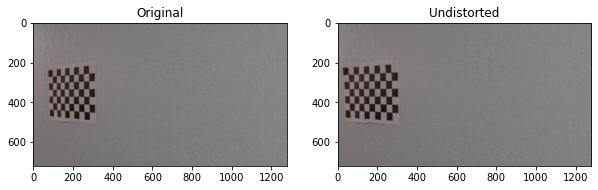

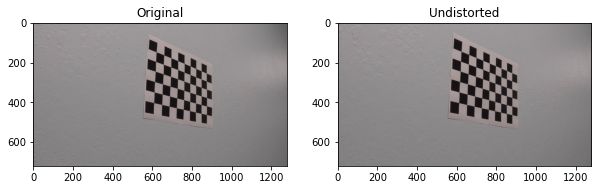

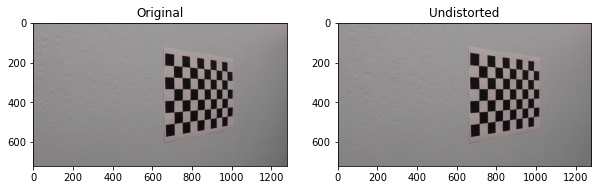

In [6]:
# Generating undistorted images on chessboard images 

cal_imgs = glob.glob(os.path.join('camera_cal/', 'calibration*'))
for fname in cal_imgs:
    img = cv2.imread(fname)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    f, ax = plt.subplots(1, 2, figsize=(10,8))
    ax[0].imshow(img)
    ax[0].set_title('Original')
    ax[1].imshow(undist)
    ax[1].set_title('Undistorted')
plt.show()